In [1]:
#1.讀取檔案
#2.決定特徵值與標籤值
#3.處理缺失值
#4.處理非數字特徵值
#5.套用模型
#6.模型評估
#7.嘗試只使用相關係數較高的欄位作為特徵，並再次評估預測結果
#8.嘗試套用特徵處理模型，並再次評估預測結果
#9.結論

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#1.讀取檔案
with open (r"/Users/fredrick/Desktop/Spotify Dataset 1921-2020.csv", errors='ignore') as f:
    df = pd.read_csv(f)
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020/5/29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020/10/23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020/11/3,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020/1/17,0.3080,75.055


In [4]:
#2.決定特徵值與標籤值
#因為id與name都不會影響我們的預測，，因此不考慮
drop_lst = ['id', 'name', 'release_date']

In [5]:
#3.處理缺失值
df.isnull().any()

valence             False
year                False
acousticness        False
artists             False
danceability        False
duration_ms         False
energy              False
explicit            False
id                  False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
name                 True
popularity          False
release_date        False
speechiness         False
tempo               False
dtype: bool

In [6]:
#4.處理非數字特徵值
#對year, artists做label encoding
from sklearn import preprocessing
import numpy as np

tmp = df.pop('artists')
le = preprocessing.LabelEncoder()
le.fit(tmp)
label_tmp = le.transform(tmp)
label_df = pd.DataFrame(label_tmp)
    
scaler = preprocessing.MinMaxScaler()
minmax_label_tmp = np.expand_dims(label_tmp, axis=-1)
scaler.fit(minmax_label_tmp)
minmax_label_tmp = scaler.transform(minmax_label_tmp)

minmax_label_df = pd.DataFrame(minmax_label_tmp, columns=['artists'])
df = df.join(minmax_label_df)

year_df = pd.get_dummies(df['year'], prefix='year')
df2 = df.join(year_df).drop('year', axis=1)
df3 = df2.drop(drop_lst, axis=1)
df4 = df3.copy()

In [27]:
#5.套用模型
#將資料丟入模型中：LinearRegression、RandomForest、AdaBoost
#LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

reg = LinearRegression()
df5 = df4.drop(['popularity'], axis=1)
y = df4.popularity
x = df5

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state=0)

reg.fit(x_train, y_train)
reg_train_score = reg.score(x_train, y_train)
reg_test_score = reg.score(x_test, y_test)

print(reg_train_score)
print(reg_test_score)

0.7880144136902307
0.8109581021669462


In [8]:
test_size_lst = []
reg_train_lst = []
reg_test_lst = []
dict_test_size = {"test_size":test_size_lst, "train_score":reg_train_lst, "test_score":reg_test_lst}

for num in np.arange(0.01, 0.99, 0.03):
    test_size_lst.append(num)
    
reg = LinearRegression()
df5 = df4.drop(['popularity'], axis=1)
y = df4.popularity
x = df5
      
for size in test_size_lst:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = size, random_state=0)
    reg.fit(x_train, y_train)
    reg_train_score = reg.score(x_train, y_train)
    reg_test_score = reg.score(x_test, y_test)
    reg_train_lst.append(reg_train_score)
    reg_test_lst.append(reg_test_score)

In [9]:
df_test_size = pd.DataFrame.from_dict(dict_test_size)
df_test_size

,test_size,train_score,test_score
0,0.01,0.788014,0.810958
1,0.04,0.787896,0.796430
2,0.07,0.787792,0.794121
3,0.10,0.787797,0.792107
4,0.13,0.787229,0.794852
5,0.16,0.786715,0.796062
6,0.19,0.786364,0.796037
7,0.22,0.786683,0.793615
8,0.25,0.786783,0.792471
9,0.28,0.786516,0.792501


Text(0, 0.5, 'acc_score')

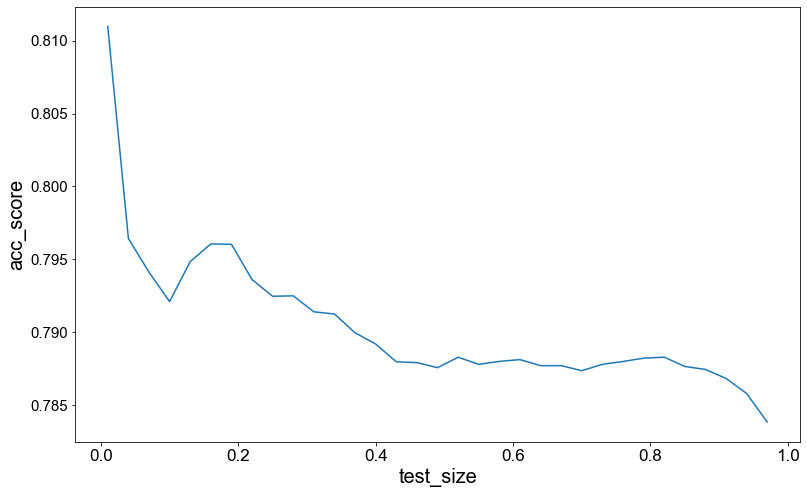

In [10]:
#可看出當test size為0.01時，score的分數最高
sns.lineplot(x='test_size', y="test_score", data=df_test_size).figure.set_size_inches(13, 8)
sns.set_theme(context='notebook', style='whitegrid', font='sans-serif', font_scale=1, color_codes='r', rc=None)
plt.xticks(size=17)
plt.yticks(size=15)
plt.xlabel('test_size', size=20)
plt.ylabel('acc_score', size=20)

In [11]:
#RadomForest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(max_depth=30, random_state=0)
forest_reg.fit(x_train, y_train)
forest_train_score = forest_reg.score(x_train, y_train)
forest_test_score = forest_reg.score(x_test, y_test)
print(forest_train_score)
print(forest_test_score)

0.9389598651465835
0.6074700612363984


In [12]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
ada_train_score = ada.score(x_train, y_train)
ada_test_score = ada.score(x_test, y_test)
print(ada_train_score)
print(ada_test_score)

0.4450119341643839
0.43650175642763733


In [28]:
#6.模型評估
#將各個模型的score存入dataframe
test_score_lst = [[reg_train_score, reg_test_score], [forest_train_score, forest_test_score],
                 [ada_train_score, ada_test_score]]
df_test_score = pd.DataFrame(test_score_lst, columns = ['train', 'test'])
df_test_score = df_test_score.rename(index={0: "LinearRegression", 1: "RandomForest", 2: "AdaBoost"})
df_test_score

,train,test
LinearRegression,0.788014,0.810958
RandomForest,0.938960,0.607470
AdaBoost,0.445012,0.436502


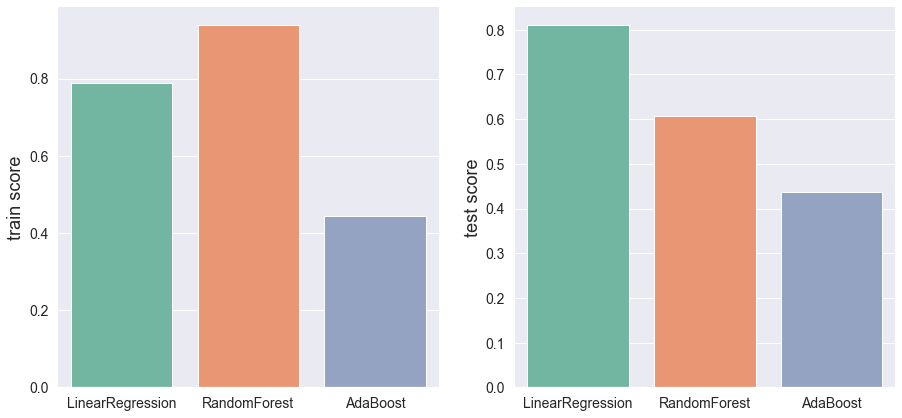

In [29]:
#以bar圖表的方式呈現各模型的test score。
#可以清楚看到LinearRegression在預測上的表現最佳，RandomForest雖然在train score的表現最佳，但在預測上表現卻較差。
#因此後續會嘗試針對LinearRegression去優化test score。
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.barplot(x=df_test_score.index, y=df_test_score['train'], palette="Set2").figure.set_size_inches(15,7)
sns.despine(left=True)
plt.ylabel('train score', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.subplot(1,2,2)
sns.barplot(x=df_test_score.index, y=df_test_score['test'], palette="Set2").figure.set_size_inches(15,7)
sns.despine(left=True)
plt.ylabel('test score', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Text(0, 0.5, 'popularity')

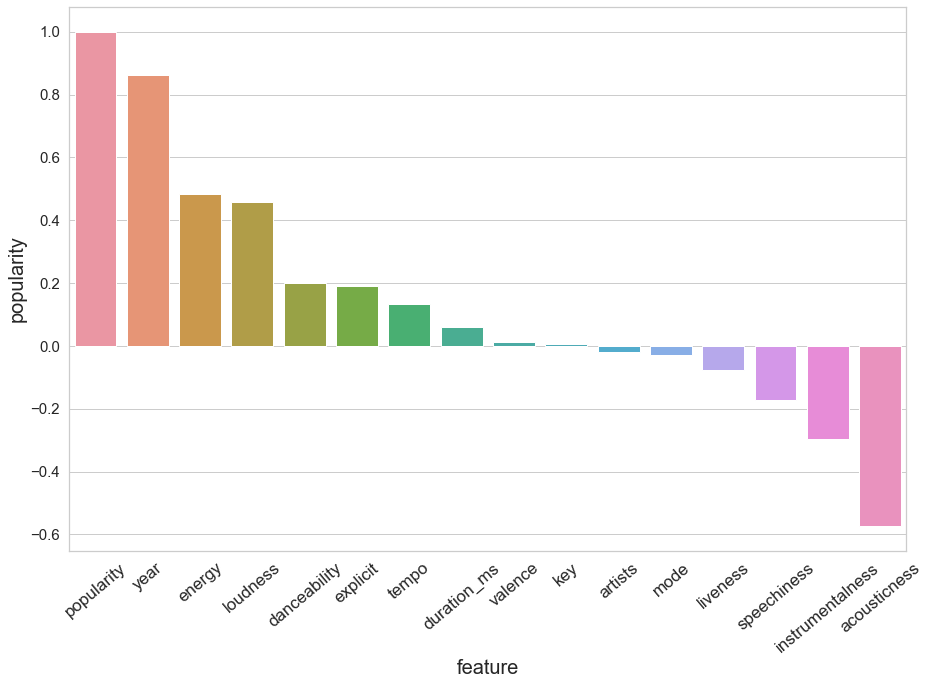

In [15]:
#7.嘗試只使用相關係數較高的欄位作為特徵，並再次評估預測結果。

col = list(df.columns)
df_corr = df[col].corr()
pop_corr = df_corr.loc['popularity'].sort_values(ascending=False)

sns.barplot(x=pop_corr.index, y=pop_corr).figure.set_size_inches(15,10)
sns.set(style="whitegrid")
plt.xticks(size=17, rotation=40)
plt.yticks(size=15)
plt.xlabel('feature', size=20)
plt.ylabel('popularity', size=20)

In [16]:
#先定義在這個資料集中，相關係數多少算高。
df_corr['popularity'].describe()

count    16.000000
mean      0.140189
std       0.402065
min      -0.573162
25%      -0.040789
50%       0.036899
75%       0.263967
max       1.000000
Name: popularity, dtype: float64

In [17]:
#相關係數多少算高
#1.正相關 大於75%
#2.負相關 小於均數減少一個標準差
std = 0.402065
high = 0.263967
low = 0.036899 - std
low

-0.365166

In [18]:
#將在相關係數範圍內的特徵取出
df4_col = list(df4.columns)
df4_corr = df4[df4_col].corr()
high_corr = []
a = df4_corr[df4_corr['popularity'] > high]['popularity'].index
b = df4_corr[df4_corr['popularity'] < low]['popularity'].index
for col in a:
    high_corr.append(col)
for col in b:
    high_corr.append(col)
    
df_high_corr = df4[high_corr]
df_high_corr = df_high_corr.join(year_df)
df_high_corr

,energy,loudness,popularity,acousticness,year_1921,year_1922,year_1923,year_1924,year_1925,year_1926,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,0.211,-20.096,4,0.98200,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.341,-12.441,5,0.73200,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.166,-14.850,5,0.96100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.309,-9.316,3,0.96700,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.193,-10.096,2,0.95700,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.808,-3.702,72,0.08460,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
170649,0.753,-6.020,68,0.20600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
170650,0.858,-2.226,76,0.10100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
170651,0.623,-7.161,70,0.00998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
#再次套入模型驗證
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

reg = LinearRegression()

df6 = df_high_corr.drop(['popularity'], axis=1)

y2 = df_high_corr.popularity
x2 = df6

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.01, random_state=0)

reg.fit(x_train, y_train)
reg_train_score2 = reg.score(x_train, y_train)
reg_test_score2 = reg.score(x_test, y_test)

print(reg_train_score2)
print(reg_test_score2)

0.7853201970448704
0.8105061650765265


In [21]:
#8.嘗試套用特徵處理模型，並再次評估預測結果
#RFE model
from sklearn.feature_selection import RFE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state=0)
train_high_score = 0
pred_high_score = 0

for num in range(1, 5):
    model = LinearRegression()
    rfe = RFE(model, num)
    x_train_rfe = rfe.fit_transform(x_train, y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe, y_train)
    train_score = model.score(x_train_rfe, y_train)
    pred_score = model.score(x_test_rfe, y_test)
    
    if (train_score > train_high_score):
        train_high_score = train_score
    if (pred_score > pred_high_score):
        pred_high_score = pred_score

print(train_high_score)
print(pred_high_score)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as

0.025822124988706285
0.029440036452231255


In [31]:
#將經過特徵處理後的分數存入dataframe。
feature_score = [[reg_train_score, reg_test_score],
                [reg_train_score2, reg_test_score2],
                [train_high_score, pred_high_score]]
df_feature = pd.DataFrame(feature_score, columns=['train', 'test'])
df_feature = df_feature.rename(index={0:"Original", 1: "High_corr", 2: "RFE", 3: "Mutual_info"})
df_feature

,train,test
Original,0.788014,0.810958
High_corr,0.785320,0.810506
RFE,0.025822,0.029440


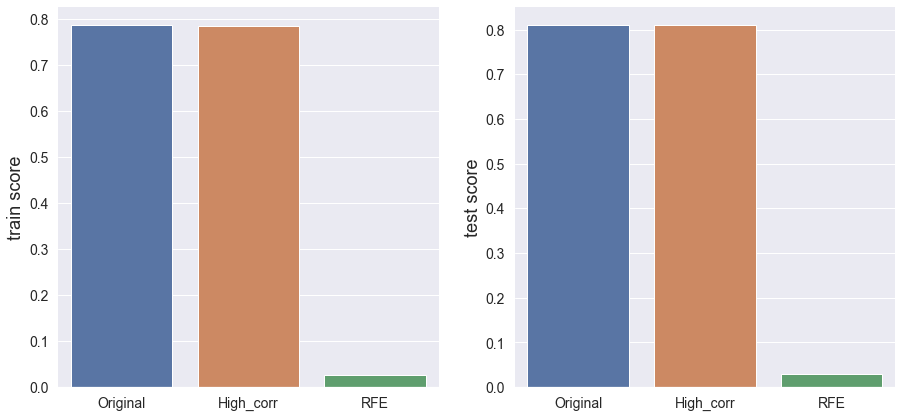

In [32]:
#用bar圖表呈現使用各個特徵處理方式後，模型所得到的分數。
#可明顯看出經過特徵處理後所得到的分數，並沒有比較好。
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.barplot(x=df_feature.index, y=df_feature['train']).figure.set_size_inches(15,7)
sns.despine(left=True)
plt.ylabel('train score', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.subplot(1,2,2)
sns.barplot(x=df_feature.index, y=df_feature['test']).figure.set_size_inches(15,7)
sns.despine(left=True)
plt.ylabel('test score', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

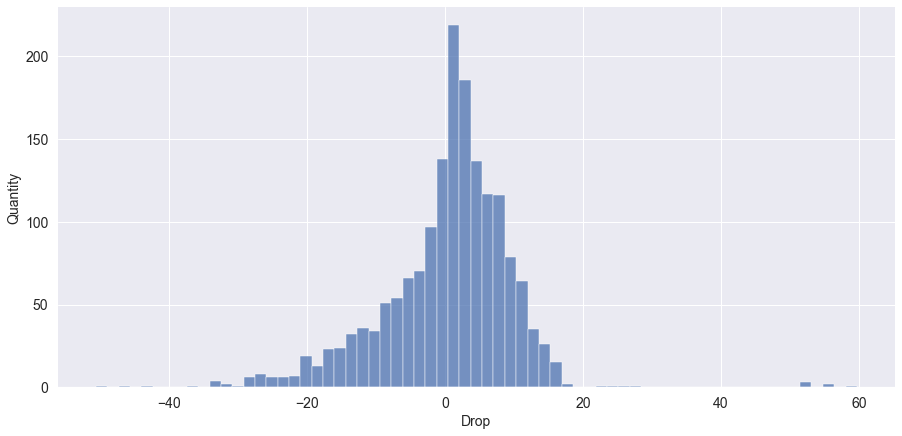

In [20]:
y_pred = reg.predict(x_test)
y_drop = y_pred - y_test

sns.set(style='darkgrid')
sns.histplot(x=y_drop).figure.set_size_inches(15,7)
sns.despine(left=True)
plt.ylabel('Quantity', size=14)
plt.xlabel('Drop', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

In [ ]:
#模型優化
#增加模型的與training data的fitting程度
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(x)
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(x_train, y_train)
poly_model.score(x_train, y_train)

In [ ]:
#9.結論
#1)在Spotify歌曲人氣度的預測上，以Linear Regression的預測效果較佳。
#2)在各個特徵中，以energy、loudness與acoustincness與popularity的相關性較大。（因爲year不可控，因此將year排除。）
#3)因year與popularity的相關性最高，目前模型也將year納入特徵中，但實務上我們並不能控制歌曲產生的年份，因此是否要將year納入特徵中，就仍有待討論。


#未來優化方向
#1)雖然嘗試透過特徵選取的方式，去優化模型在預測上的準確度，但目前所使用選取方式效果相當差。
#2)未來可以再嘗試套用其他種類的特徵選取模型。
#3)可以透過polynomialfeatures將特徵的權重加重，以增加訓練資料的擬合度。